In [14]:
import random as rnd
import time
import string
import matplotlib.pyplot as plt
import numpy as np

In [25]:
state=0 # stores the current state, one among (m+1) states

def find_state(mem,state):  # Finds the appropriate state to shift to after reading character
    j=0
    cond=True
    while(cond):
        j+=1
        cond=(mem[len(mem)-j:len(mem):1]==p[0:j:1])
        if(cond==False):
            return j-1
    return j-1

def pattern_match(s,p): # Finds the pattern in the string
    mem=[] #stores part of the string currently being processed (becomes null when state goes to 0)
    match_part=[] #stores the starting and ending index of pattern (wherever it occurs)
    state=0
    n=len(s)
    m=len(p)
    li=0 # li stores the index of s when the pattern began
    for i in range(n):
        ele=s[i]
        mem.append(ele)
        if(ele==p[state]): # If character matches with the next pattern character, then we just increment state
            state+=1
        else:
            state=find_state(mem,state)
        if(state==0):
            mem=[]
            li=i+1
        if(state==m):
            match_part.append([li,i])
            state=find_state(mem,state) #update state so that it is in range
    return match_part
            
strn=input("Enter the string: ")
pattern=input("Enter the pattern: ")
pattern_match(strn,pattern) #Returns array of regions where the pattern or repetitions of the pattern occur


    
    




    

Enter the string: 12345
Enter the pattern: 80


[]

Text(0.5, 1.0, 'Runtimes vs m (n=1000)')

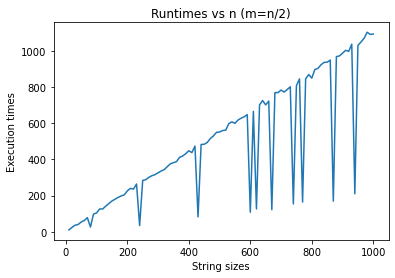

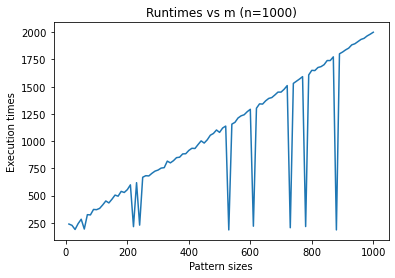

In [27]:
state=0 # stores the current state, one among (m+1) states

def find_state(mem,state):  # Finds the appropriate state to shift to after reading character
    j=0
    cond=True
    while(cond):
        j+=1
        cond=(mem[len(mem)-j:len(mem):1]==p[0:j:1])
        if(cond==False):
            return j-1
    return j-1

def pattern_match(s,p): # Finds the pattern in the string
    time_ind=0 # This variable is a measure of run-time
    mem=[] #stores part of the string currently being processed (becomes null when state goes to 0)
    match_part=[] #stores the starting and ending index of pattern (wherever it occurs)
    state=0
    n=len(s)
    m=len(p)
    li=0 # li stores the index of s when the pattern began
    for i in range(n):
        ele=s[i]
        mem.append(ele)
        if(ele==p[state]): # If character matches with the next pattern character, then we just increment state
            state+=1
            time_ind+=1
        else:
            state1=state
            state=find_state(mem,state)
            time_ind += max(state1-state,state-state1)
        if(state==0):
            mem=[]
            li=i+1
        if(state==m):
            state1=state
            state=find_state(mem,state)
            time_ind += max(state1-state,state-state1)
    return match_part,time_ind
            
strn_sizes=[]
unit=10
times_n=[]
times_m=[]
for i in range(int(1000/unit)):
    strn_sizes.append(unit*(i+1))

#We compute times for fixed m and varying n and store it in times_n[]
for n in strn_sizes:
    strn=''.join(rnd.choices(string.digits, k = n))
    pattern=strn[int(n/4):int(3*n/4):1] #Here we fix m = n/2 and choose the elements from index n/4 to 3n/4 as pattern
    #start=time.time()
    match_part,time_ind=pattern_match(strn,pattern)
    #end=time.time()
    times_n.append(time_ind)

#We compute times for fixed n=1000 and varying m and store it in times_m[]
m=10
while(m<=1000):
    pattern=strn[len(strn)-m:len(strn):1]
    #start=time.time()
    match_part,time_ind=pattern_match(strn,pattern)
    pattern_match(strn,pattern)
    #end=time.time()
    times_m.append(time_ind)
    m+=10
    
#Lets plot times_m and times_n
p1=plt.figure(1)
plt.plot(strn_sizes,times_n)
plt.xlabel("String sizes")
plt.ylabel("Execution times")
plt.title("Runtimes vs n (m=n/2)")

m_axis = np.arange(10,1010,10)
p2=plt.figure(2)
plt.plot(m_axis,times_m)
plt.xlabel("Pattern sizes")
plt.ylabel("Execution times")
plt.title("Runtimes vs m (n=1000)")

    
    




    

As seen above the time complexity of the algorithm determined in two cases is:

1. Case one - [varying n and fixed m=(n/2) ] = O(n)

2. Case two - [varying m and fixed n=1000 ] = O(m)

Overall we can claim that the finite automata algorithm is of linear time complexity

